In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Langmuir function

In [2]:
def f_Langmuir (L, **kwargs):
    
    F = []
    X = kwargs.get("P")
    Y = kwargs.get("Y")
    
    row, column = np.shape(L)
    
    for i in range(int(column)):
        f = abs((((L[0,i] * X)/(1+L[1,i]*X))- Y)**2)/len(X)
        F.append(np.sum(f))
    
    fobj = np.array(F)
    
    return fobj

### Freundlich function

In [3]:
def f_Freundlich (L, **kwargs):
    
    F = []
    X = kwargs.get("P")
    Y = kwargs.get("Y")
    row, column = np.shape(L)
    
    for i in range(int(column)):
        f = abs((L[0,i] * (X**(1/L[1,i]))- Y))/len(X)
        F.append(np.sum(f))
    
    fobj = np.array(F)
    
    return fobj

### Sips function

In [4]:
def f_Sips (P, **kwargs):
    
    F = []
    X = kwargs.get("P")
    Y = kwargs.get("Y")
    row, column = np.shape(L)
    
    for i in range(int(column)):
        f = abs(((L[0,i] * (X**L[2,i]))/(1+L[1,i]*(X**L[2,i]))- Y)**2)/len(X)
        F.append(np.sum(f))
    
    fobj = np.array(F)
    
    return fobj

### Radke-Prausnitz function

In [5]:
def f_Radke (P, **kwargs):
    
    F = []
    X = kwargs.get("P")
    Y = kwargs.get("Y")
    row, column = np.shape(L)
    
    for i in range(int(column)):
        f = abs(((L[0,i] * X)/(1+L[1,i]*(X**L[2,i]))- Y)**2)/len(X)
        F.append(np.sum(f))
    
    fobj = np.array(F)
    
    return fobj

### Particle Swarm Optimization (PSO)

In [6]:
def PSO (f, bound, w =0.8, c1=0.1, c2=0.1, n_part=20, n_ite=100, **kwargs):
    
    P = kwargs.get("P")
    Y = kwargs.get("Y")
    
    #----------------------------------------------- Some variables ------------------------------------------# 
    n_var = len(bound)
    cont  = 0
    
    #------------------------------- Definition of initial particles and velocity ----------------------------#
    V     = np.random.randn(n_var, n_part) * 0.1
    X     = np.zeros((n_var,n_part))
    
    #------------------------------------- Restriction for not crossing the bounds ---------------------------#
    for l,Bound in enumerate(bound):
        N     = int((n_part)/2)
        x_min = np.random.rand(1, N) * Bound[0]
        x_max = np.random.rand(1, abs(N-n_part)) * Bound[1]
        x     = np.concatenate((x_min, x_max), axis = None)
        X[l,:]= x
        
    #------------------------------------ Definition of initial P_best and G_best ----------------------------#
    P_best   = X
    P_best_f = f(X, P=P, Y=Y)
    G_best   = P_best[:, P_best_f.argmin()]
    G_best_f = P_best_f.min()
    
    #-------------------------------------------- Iterative procedure ----------------------------------------#
    while(cont < n_ite):
        r   = np.random.rand(n_var)
        V   = w * V + c1*r[0]*(P_best - X) + c2*r[1]*(G_best.reshape(-1,1)-X)
        X   = X + V
        
        #-------------------- Restriction for the particles not crossing the bounds -------------------------#
        for m, Bound in enumerate(bound):
            X[m,(X[m,:]<Bound[0])] = Bound[0]
            X[m,(X[m,:]>Bound[1])] = Bound[1]
        
        #-------------------------------------- New P_best and G_best ---------------------------------------#
        obj = f(X, P=P, Y=Y)
        P_best[:, (P_best_f >= obj)] = X[:, (P_best_f >= obj)]
        P_best_f   = np.array([P_best_f, obj]).min(axis=0)
        G_best     = P_best[:, P_best_f.argmin()]
        G_best_f   = P_best_f.min()
        cont +=1
        
    return G_best_f, G_best

### Plot function

In [7]:
def plot_func(L, Model, **kwargs):
    
    X = kwargs.get("P")
    Y = kwargs.get("Y")
    
    if Model == 'Langmuir':
        y_pred = (L[0] * X)/(1+L[1]*X)

    elif Model == 'Freundlich':
        y_pred = L[0] * (X**(1/L[1]))
        
    elif Model == 'Sips':
        y_pred = (L[0] * (X**L[2]))/(1+L[1]*(X**L[2]))
        
    elif Model == 'Radke':
        y_pred = (L[0] * X)/(1+L[1]*(X**L[2]))
        
    
    fig, axe = plt.subplots(1, 1, figsize = (10,5))
    axe.scatter(X, Y, color = 'red', label = 'Experimental points')
    axe.plot(X, y_pred, color = 'black', label = 'Model')
    axe.legend(loc= 'best')
    axe.set_title(Model, fontsize=14)
    axe.set_xlabel("Pressure-Psia")
    axe.set_ylabel("Amount adsorbed - Mol/Kg")

### Performing the above functions

The value of cost function is:  0.0022310147422870573

The parameters are:
[0.04009673 0.00768647]


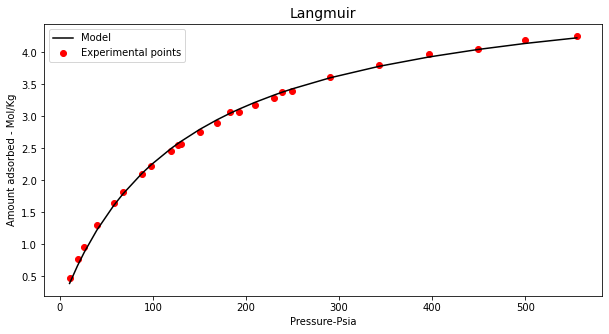

In [8]:
#------------------------------------------------ Dataset --------------------------------------------#
P = np.array([10.5, 19.1, 26.3, 39.8, 57.8, 67.8, 87.9, 98.3,
             119.4, 126.6, 129.8, 150.4, 168.6, 182.9, 192.7, 
             209.4, 230.3, 238.4, 249.3, 290.4, 343.3, 396.2,
             449.1, 500.0, 555.4])

Y = np.array([0.477, 0.764, 0.966, 1.298, 1.644, 1.811, 2.097,
             2.230, 2.463, 2.560, 2.564, 2.748, 2.894, 3.065,
             3.064, 3.174, 3.284, 3.385, 3.395, 3.617, 3.806, 
              3.974, 4.049, 4.195, 4.250])

#--------------------------------------- Bounds of PSO optimization ----------------------------------#
bound_Langmuir    = [(1E-3,5), (1E-3,5)]
#bound_Freundlich  = [(1E-2,5), (1E-3,5)]
#bound_Sips         = [(1E-3,5), (1E-3,5), (1E-3,5)]
#bound_Radke        = [(1E-3,5), (1E-3,5), (1E-3,5)]


#---------------------------------------------- Optimization -----------------------------------------#
f_obj, params = PSO(f_Langmuir, bound_Langmuir, P=P, Y=Y)
#f_obj, params = PSO(f_Freundlich, bound_Freundlich, n_part = 60, P=P, Y=Y)
#f_obj, params  = PSO(f_Sips, bound_Sips, n_part = 400, n_ite = 5000, P=P, Y=Y)
#f_obj, params  = PSO(f_Radke, bound_Radke, n_part = 200, n_ite = 1000, P=P, Y=Y)

#------------------------------------------------- Plot ----------------------------------------------#
plot_func(params, Model='Langmuir', P=P, Y=Y)

#------------------------------------------- Parameters found ----------------------------------------#
print("The value of cost function is: ",f_obj)
print("")
print("The parameters are:")
print(params)